<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/RegularizationForANN_CNN_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resource: https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

# We will use a standard binary classification problem
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2, l1, l1_l2

In [ ]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

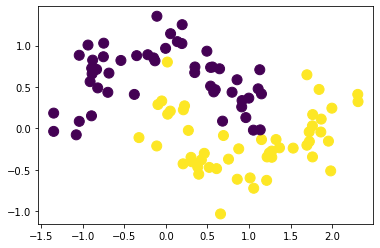

In [ ]:
plt.scatter( X[:, 0], X[:, 1], c=y, s=100 );

In [ ]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

<h1>Without regularization</h1>

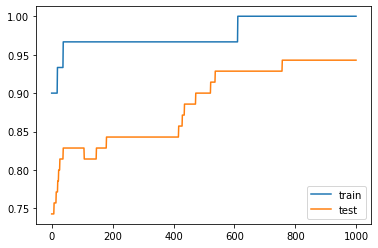

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [ ]:
# We can see an expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again.

<h1>With regularization</h1>

In [ ]:
# MLP Model With Weight Regularization
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001) ))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0)

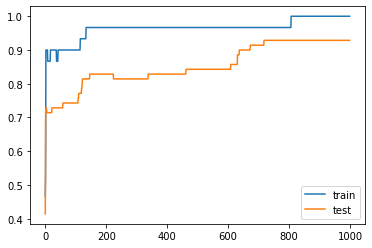

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend();

In [ ]:
# As expected, we see the learning curve on the test dataset rise and then plateau, indicating that the model may not have overfit the training dataset.

<h1>Grid Search Regularization Hyperparameter</h1>

In [ ]:
'''
    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.
    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.
'''

'\n    Once we can confirm that weight regularization may improve your overfit model, we can test different values of the regularization parameter.\n    It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.\n'

In [ ]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()

for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)

Param: 0.100000, Train: 0.900, Test: 0.814
Param: 0.010000, Train: 0.967, Test: 0.829
Param: 0.001000, Train: 0.967, Test: 0.843
Param: 0.000100, Train: 0.967, Test: 0.843
Param: 0.000010, Train: 0.967, Test: 0.857
Param: 0.000001, Train: 0.967, Test: 0.843


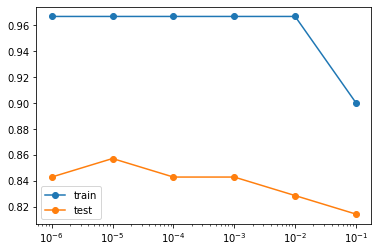

In [ ]:
# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend();

In [ ]:
# We can see that using the largest value of 0.1, results in a large drop in both train and test accuracy.

In [ ]:
# For adding regularization to the bias 
# model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

# For adding regularization in CNN
# model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# Weight regularization does not seem widely used in CNN models, or if it is used, its use is not widely reported.

# For adding regularization in LSTM
# model.add(LSTM(32, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
# It is common to use weight regularization with LSTM models.
# An often used configuration is L2 (weight decay) and very small hyperparameters (e.g. 10^−6). 
# It is often not reported what weights are regularized (input, recurrent, and/or bias), although one would assume that both 
# input and recurrent weights are regularized only

In [ ]:
'''
    1) Try Alternates. Update the example to use L1 or the combined L1L2 methods instead of L2 regularization.
    2) Report Weight Norm. Update the example to calculate the magnitude of the network weights and demonstrate that regularization indeed made the 
       magnitude smaller.
    3) Regularize Output Layer. Update the example to regularize the output layer of the model and compare the results.
    4) Regularize Bias. Update the example to regularize the bias weight and compare the results.
    5) Repeated Model Evaluation. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.
'''

<h1>Dataset Augmentation</h1>

In [2]:
# Resource: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

# Modern deep learning algorithms, such as the convolutional neural network, or CNN, can learn features that are invariant to their location in 
# the image. Nevertheless, augmentation can further aid in this transform invariant approach to learning and can aid the model 
# in learning features that are also invariant to transforms such as left-to-right to top-to-bottom ordering, light levels in photographs, and more.

# Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different 
# from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model.

In [3]:
# Image source: https://www.flickr.com/photos/thenovys/3854468621/

# A range of techniques are supported, as well as pixel scaling methods. 
# We will focus on five main types of data augmentation techniques for image data; specifically:

# Image shifts via the width_shift_range and height_shift_range arguments.
# Image flips via the horizontal_flip and vertical_flip arguments.
# Image rotations via the rotation_range argument
# Image brightness via the brightness_range argument.
# Image zoom via the zoom_range argument.

In [4]:
# An iterator can be created for an image dataset.
# The iterator will return one batch of augmented images for each iteration.
# An iterator can be created from an image dataset loaded in memory via the flow() function; for example:
# create iterator
# it = datagen.flow(X, y)

In [5]:
# Alternately, an iterator can be created for an image dataset located on disk in a specified directory, 
# where images in that directory are organized into subdirectories according to their class.

# # create iterator
# it = datagen.flow_from_directory(X, y, ...)

In [6]:
# Once the iterator is created, it can be used to train a neural network model by 
# calling the fit_generator() function.

# The images in the dataset are not used directly. Instead, only augmented images are provided to the model. 
# Because the augmentations are performed randomly, this allows both modified images 
# and close facsimiles of the original images (e.g. almost no augmentation) to be generated and used during training.

In [7]:
# A data generator can also be used to specify the validation dataset and the test dataset. 
# Often, a separate ImageDataGenerator instance is used that may have the same pixel scaling configuration 
# (not covered in this tutorial) as the ImageDataGenerator instance used for the training dataset, but would not use 
# data augmentation. This is because data augmentation is only used as a technique 
# for artificially extending the training dataset in order to improve model performance on an unaugmented dataset.



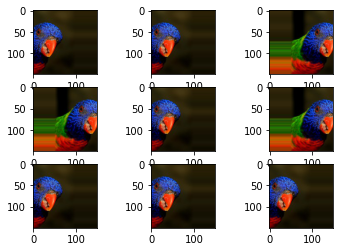

In [9]:
# A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, 
# while keeping the image dimensions the same.

# This means that some of the pixels will be clipped off the image and there will be a region of the image where 
# new pixel values will have to be specified.

# The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control 
# the amount of horizontal and vertical shift respectively.

# These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the 
# width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

# Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for 
# each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or 
# array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/content/bird.jpg')

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
# the image dimensions are (150, 150)
datagen = ImageDataGenerator(width_shift_range=[-50,50])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [10]:
# We can see in the plot of the result that a range of different randomly selected positive and negative horizontal shifts 
# was performed and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created 
# by the shift.

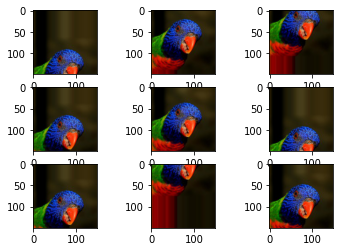

In [11]:
# Below is the same example updated to perform vertical shifts of the image via the height_shift_range argument

datagen = ImageDataGenerator(height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

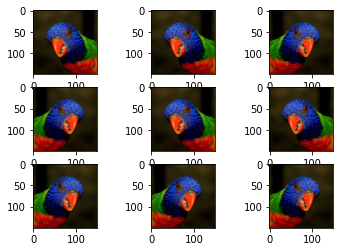

In [12]:
# Horizontal and Vertical Flip Augmentation
# An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

#  The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor.
#  For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.
#  For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps 
#  vertical flips make sense.

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# looping 9 times and generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

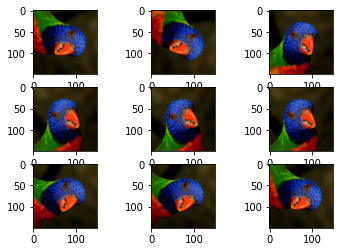

In [13]:
# Random Rotation Augmentation

# A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.
# The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# The example below demonstrates random rotations via the rotation_range argument,
#  with rotations to the image between 0 and 90 degrees.

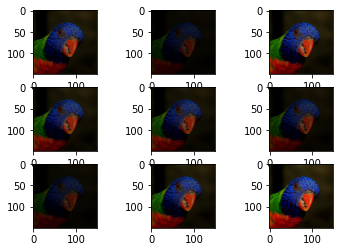

In [14]:
# Random Brightness Augmentation
# The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.
# The intent is to allow a model to generalize across images trained on different lighting levels.
# This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a 
# float representing a percentage for selecting a brightening amount.
# Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, 
# e.g. [1.0, 1.5], where 1.0 has no effect on brightness.
# The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the 
# image between 1.0 (no change) and 0.2 or 20%.

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2, 1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

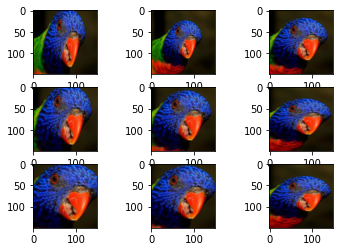

In [15]:
# Random Zoom Augmentation
# A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.
# Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.
# If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).
# The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

# The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes 
# the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, 
# e.g. [1.5, 1.5] makes the object in the image smaller or further away. A zoom of [1.0,1.0] has no effect.

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()